### 1. Setup

### 1.1 Install the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

c:\Users\Vei Vei\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


### 1.2 Read the data & convert into dataframe

In [2]:
df = pd.read_csv("./clients.csv");

In [3]:
df.head()

,month,credit_amount,credit_term,age,sex,education,product_type,having_children_flg,region,income,family_status,phone_operator,is_client,bad_client_target
0,1,7000,12,39,male,Secondary special education,Cell phones,0,2,21000,Another,0,0,0
1,1,19000,6,20,male,Secondary special education,Household appliances,1,2,17000,Another,3,1,0
2,1,29000,12,23,female,Secondary special education,Household appliances,0,2,31000,Another,2,0,0
3,1,10000,12,30,male,Secondary special education,Cell phones,1,2,31000,Unmarried,3,1,0
4,1,14500,12,25,female,Higher education,Cell phones,0,2,26000,Married,0,1,0


### 1.3 Descriptive statitics on the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723 entries, 0 to 1722
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   month                1723 non-null   int64 
 1   credit_amount        1723 non-null   int64 
 2   credit_term          1723 non-null   int64 
 3   age                  1723 non-null   int64 
 4   sex                  1723 non-null   object
 5   education            1723 non-null   object
 6   product_type         1723 non-null   object
 7   having_children_flg  1723 non-null   int64 
 8   region               1723 non-null   int64 
 9   income               1723 non-null   int64 
 10  family_status        1723 non-null   object
 11  phone_operator       1723 non-null   int64 
 12  is_client            1723 non-null   int64 
 13  bad_client_target    1723 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 188.6+ KB


In [5]:
df.describe()

,month,credit_amount,credit_term,age,having_children_flg,region,income,phone_operator,is_client,bad_client_target
count,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000
mean,6.708067,29264.654672,11.546721,35.911782,0.428323,1.681370,32652.350551,1.125363,0.604759,0.113755
std,3.538420,27926.778301,6.548354,13.120203,0.494979,0.704256,20913.193158,1.015822,0.489044,0.317606
min,1.000000,5000.000000,3.000000,18.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,0.000000
25%,3.000000,13000.000000,6.000000,26.000000,0.000000,2.000000,21000.000000,0.000000,0.000000,0.000000
50%,7.000000,21500.000000,12.000000,32.000000,0.000000,2.000000,27000.000000,1.000000,1.000000,0.000000
75%,10.000000,34000.000000,12.000000,44.000000,1.000000,2.000000,38000.000000,2.000000,1.000000,0.000000
max,12.000000,301000.000000,36.000000,90.000000,1.000000,2.000000,401000.000000,4.000000,1.000000,1.000000


In [6]:
df.bad_client_target.value_counts()

0    1527
1     196
Name: bad_client_target, dtype: int64

### 1.4 Use histogram to visualize

In [9]:
df_good = df[df.bad_client_target == 0].drop(columns=['bad_client_target'])
df_bad = df[df.bad_client_target == 1].drop(columns=['bad_client_target'])

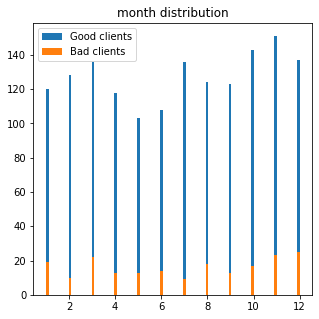

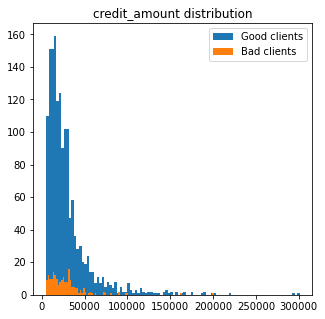

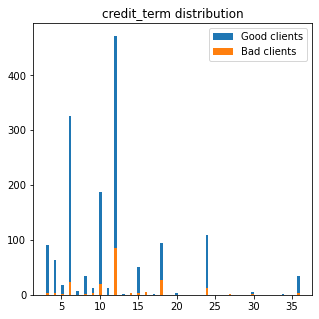

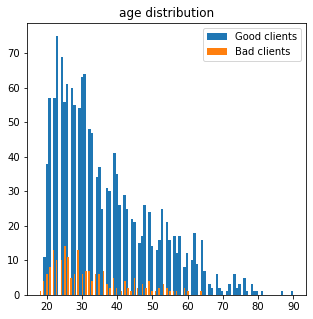

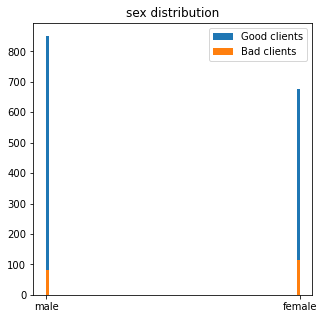

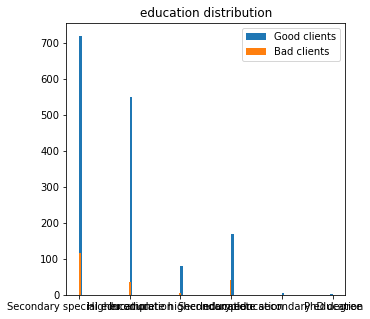

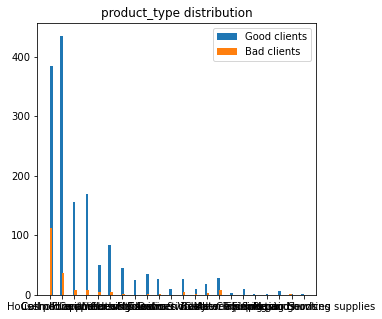

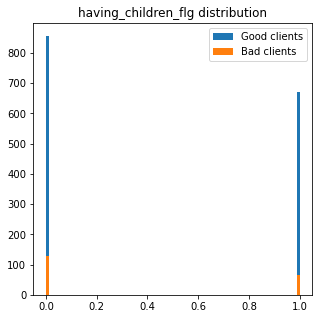

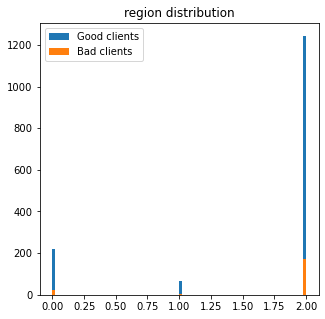

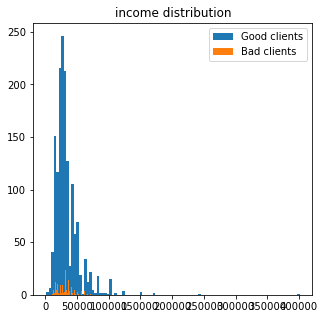

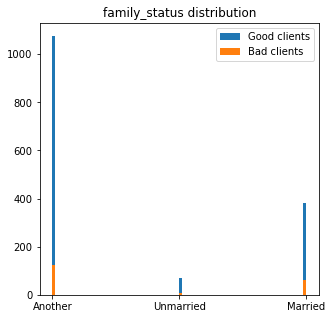

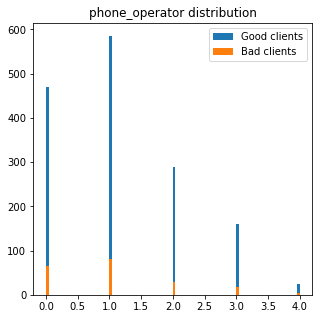

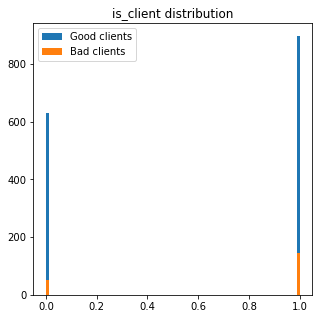

In [11]:
for col in df_good.columns:
    plt.figure(figsize=(5, 5))
    plt.hist(df_good[col], bins=100)
    plt.hist(df_bad[col], bins=100)
    plt.title(f'{col} distribution')
    plt.legend(['Good clients', 'Bad clients'])

### 1.4 Binary encode

In [12]:
df['sex'] = df['sex'].replace({'female':0, 'male':1})
df['family_status'] = df['family_status'].replace({'Another':0, 'Unmarried':1, 'Married': 2})

In [13]:
gle = LabelEncoder()
product_type_labels = gle.fit_transform(df['product_type'])
product_type_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
product_type_mappings

{0: 'Audio & Video',
 1: 'Auto',
 2: 'Boats',
 3: 'Cell phones',
 4: "Childen's goods",
 5: 'Clothing',
 6: 'Computers',
 7: 'Construction Materials',
 8: 'Cosmetics and beauty services',
 9: 'Fishing and hunting supplies',
 10: 'Fitness',
 11: 'Furniture',
 12: 'Garden equipment',
 13: 'Household appliances',
 14: 'Jewelry',
 15: 'Medical services',
 16: 'Music',
 17: 'Repair Services',
 18: 'Sporting goods',
 19: 'Tourism',
 20: 'Training',
 21: 'Windows & Doors'}

In [14]:
education_labels = gle.fit_transform(df['education'])
education_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
education_mappings

{0: 'Higher education',
 1: 'Incomplete higher education',
 2: 'Incomplete secondary education',
 3: 'PhD degree',
 4: 'Secondary education',
 5: 'Secondary special education'}

In [15]:
df['education'] = education_labels
df['product_type'] = product_type_labels
df.head()

,month,credit_amount,credit_term,age,sex,education,product_type,having_children_flg,region,income,family_status,phone_operator,is_client,bad_client_target
0,1,7000,12,39,1,5,3,0,2,21000,0,0,0,0
1,1,19000,6,20,1,5,13,1,2,17000,0,3,1,0
2,1,29000,12,23,0,5,13,0,2,31000,0,2,0,0
3,1,10000,12,30,1,5,3,1,2,31000,1,3,1,0
4,1,14500,12,25,0,0,3,0,2,26000,2,0,1,0


## 3. Random Forest Algorithm

In [16]:
# Split the data into train & test units

x = df.drop(columns=['bad_client_target'])
y = df['bad_client_target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)
print('x_train.shape')
print(x_train.shape)
print('y_train.shape')
print(x_test.shape)

x_train.shape
(1206, 13)
y_train.shape
(517, 13)


In [17]:
# Random Forest Algorithm 

rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [18]:
y_pred_rf = rf_model.predict(x_test)
print('confusion matrix')
print(metrics.confusion_matrix(y_test, y_pred_rf))
print('classification report')
print(metrics.classification_report(y_test,y_pred_rf))
print('accuracy: %f' %(metrics.accuracy_score(y_test, y_pred_rf)))
print('area under the curve: %f' % (metrics.roc_auc_score(y_test, y_pred_rf)))

confusion matrix
[[460   3]
 [ 51   3]]
classification report
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       463
           1       0.50      0.06      0.10        54

    accuracy                           0.90       517
   macro avg       0.70      0.52      0.52       517
weighted avg       0.86      0.90      0.86       517

accuracy: 0.895551
area under the curve: 0.524538


## 4. Random Under Sampling

In [19]:
#Taking 10% of not bad client and merge it with bad client data
df_good = df[df.bad_client_target == 0]
df_bad = df[df.bad_client_target == 1]

#random sampling
ignore_me, sample = train_test_split(df_good, test_size = len(df_bad)) 

In [20]:
import warnings
warnings.filterwarnings("ignore")

sample = pd.concat([sample, df_bad])

sample
sample.bad_client_target.value_counts()

0    196
1    196
Name: bad_client_target, dtype: int64

In [27]:
#Split into train and test units

x1 = sample.drop(columns=['bad_client_target'])
y1 = sample['bad_client_target']

x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.30,random_state=0)
print('x1_train.shape')
print(x1_train.shape)
print('x1_test.shape')
print(x1_test.shape)

x1_train.shape
(274, 13)
x1_test.shape
(118, 13)


In [22]:
#Random Forest Algorithm on resampled dataset

rf_model1 = RandomForestClassifier()
rf_model1.fit(x1_train,y1_train)

RandomForestClassifier()

In [23]:
y1_pred_rf = rf_model1.predict(x1_test)
print('confusion matrix')
print(metrics.confusion_matrix(y1_test, y1_pred_rf))
print('classification report')
print(metrics.classification_report(y1_test,y1_pred_rf))
print('accuracy: %f' %(metrics.accuracy_score(y1_test, y1_pred_rf)))

confusion matrix
[[43 15]
 [15 45]]
classification report
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        58
           1       0.75      0.75      0.75        60

    accuracy                           0.75       118
   macro avg       0.75      0.75      0.75       118
weighted avg       0.75      0.75      0.75       118

accuracy: 0.745763


## 5. SMOTE

In [24]:
x2 = df.drop(columns=['bad_client_target'])
y2 = df['bad_client_target']

In [25]:
#Increase the bad samples from 196 to 600

sm = SMOTE()
x_res,y_res = sm.fit_resample(x2,y2)
print('Resample dataset shape {}'.format(Counter(y_res)))

Resample dataset shape Counter({0: 1527, 1: 1527})


In [28]:
#Split into train and test units

x2_train,x2_test,y2_train,y2_test = train_test_split(x_res,y_res,test_size=0.30,random_state=0)
print('x2_train.shape')
print(x2_train.shape)
print('x2_test.shape')
print(x2_test.shape)

x2_train.shape
(2137, 13)
x2_test.shape
(917, 13)


In [29]:
#Random Forest Classifier on resampled data

rf_model2 = RandomForestClassifier()
rf_model2.fit(x2_train,y2_train)

RandomForestClassifier()

In [30]:
y2_pred_rf = rf_model2.predict(x2_test)
print('confusion matrix')
print(metrics.confusion_matrix(y2_test, y2_pred_rf))
print('classification report')
print(metrics.classification_report(y2_test,y2_pred_rf))
print('accuracy: %f' %(metrics.accuracy_score(y2_test, y2_pred_rf)))

confusion matrix
[[432  57]
 [ 42 386]]
classification report
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       489
           1       0.87      0.90      0.89       428

    accuracy                           0.89       917
   macro avg       0.89      0.89      0.89       917
weighted avg       0.89      0.89      0.89       917

accuracy: 0.892039
